Reference:
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

## Data loading

In [5]:
DF= pd.read_csv("../train.csv")
DF.LotFrontage.fillna(round(np.mean(DF.LotFrontage)), inplace=True)
DF.MasVnrArea.fillna(round(np.mean(DF.MasVnrArea)), inplace=True)
DF.GarageYrBlt.fillna(round((np.mean(DF.GarageYrBlt))-3.5*(np.var(DF.GarageYrBlt))**0.5), inplace=True)
DF_NAs = DF.fillna("NA", inplace=False)
kees = dict(DF_NAs).keys()
categorical_vars = [k for k in kees if (DF_NAs[k]).dtype == object]
len([print(k, (DF_NAs[k]).dtype, set(DF_NAs[k])) for k in categorical_vars])
DF = pd.get_dummies(DF, columns=categorical_vars, drop_first=False)

MSZoning object {'FV', 'RM', 'C (all)', 'RL', 'RH'}
Street object {'Grvl', 'Pave'}
Alley object {'NA', 'Grvl', 'Pave'}
LotShape object {'Reg', 'IR1', 'IR2', 'IR3'}
LandContour object {'Bnk', 'Lvl', 'HLS', 'Low'}
Utilities object {'NoSeWa', 'AllPub'}
LotConfig object {'Corner', 'CulDSac', 'Inside', 'FR3', 'FR2'}
LandSlope object {'Gtl', 'Sev', 'Mod'}
Neighborhood object {'Crawfor', 'SWISU', 'CollgCr', 'Blmngtn', 'MeadowV', 'NWAmes', 'Mitchel', 'NPkVill', 'BrkSide', 'NAmes', 'NridgHt', 'Veenker', 'Somerst', 'Edwards', 'Gilbert', 'Blueste', 'BrDale', 'IDOTRR', 'NoRidge', 'Timber', 'Sawyer', 'SawyerW', 'OldTown', 'ClearCr', 'StoneBr'}
Condition1 object {'Artery', 'PosN', 'Norm', 'RRAn', 'PosA', 'Feedr', 'RRNn', 'RRNe', 'RRAe'}
Condition2 object {'Artery', 'PosN', 'Norm', 'RRAn', 'PosA', 'Feedr', 'RRNn', 'RRAe'}
BldgType object {'Duplex', '2fmCon', 'TwnhsE', '1Fam', 'Twnhs'}
HouseStyle object {'1.5Unf', 'SLvl', '1Story', '2Story', '2.5Fin', 'SFoyer', '1.5Fin', '2.5Unf'}
RoofStyle object {'H

In [6]:
DF.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [7]:
DF.shape

(1460, 290)

## Data preprocessing

In [9]:
# Importing the dataset
dataset = DF.copy()

# X is the predictor variable
X = DF.iloc[:, 0:80].values

# y is the response variable
y = DF.SalePrice.values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\Julia\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [11]:
#Prediction
y_pred=clf.predict(x_test)
y_pred

array([ 187403.80371277,  170174.10875062,  163793.6467932 ,
        186324.5360214 ,  160809.88814075,  158533.80764424,
        208343.35102001,  168388.32936459,  236059.35458074,
        175946.56004896,  184673.77060112,  171529.67154963,
        193088.97545184,  165735.39122209,  165929.27818341,
        170307.31162441,  186834.5646666 ,  165586.22461129,
        172199.33061743,  178347.35792761,  172997.67464116,
        171664.35749584,  164684.42743448,  177632.06214873,
        181461.76144761,  183415.36557182,  180187.23196233,
        156673.17726989,  214035.22441319,  164385.92334251,
        172965.62333972,  184907.47716092,  173516.4714137 ,
        205196.78585018,  233425.7625119 ,  179725.59088315,
        204634.69124826,  165918.60133514,  198074.86092793,
        209790.37128738,  192018.87157081,  168810.7834738 ,
        178855.39663901,  214976.78733517,  230710.80791703,
        168164.10868106,  166535.81565518,  166813.75127093,
        177453.20436763,

In [12]:
mse = np.mean((y_pred-y_test)**2)
mse

4163019616.8155346

In [13]:
mse**0.5

64521.466325677495

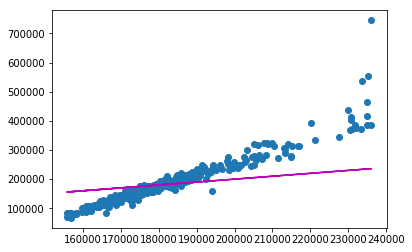

In [14]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

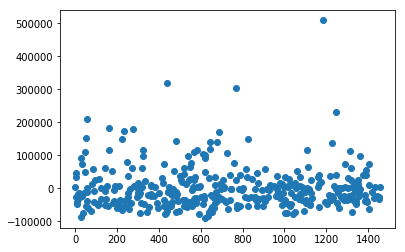

In [15]:
plt.scatter(x_test[:,0],y_test-y_pred)
plt.show()